AGNES(BOTTOM UP)

In [ ]:
#AGNES

from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data


In [ ]:
from sklearn.cluster import AgglomerativeClustering

clustering = AgglomerativeClustering(n_clusters=3, linkage='ward', affinity='euclidean')
clustering.fit(X)


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


AgglomerativeClustering(affinity='euclidean', n_clusters=3)

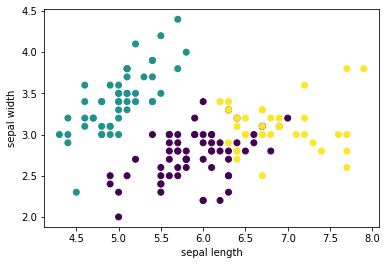

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.DataFrame(data=X, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
df['cluster'] = clustering.labels_

plt.scatter(df['sepal_length'], df['sepal_width'], c=df['cluster'])
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()


Clusters:
Cluster 0: [ 50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67
  68  69  70  71  72  73  74  75  76  78  79  80  81  82  83  84  85  86
  87  88  89  90  91  92  93  94  95  96  97  98  99 101 106 113 114 119
 121 123 126 127 133 134 138 142 146 149]
Cluster 1: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49]
Cluster 2: [ 77 100 102 103 104 105 107 108 109 110 111 112 115 116 117 118 120 122
 124 125 128 129 130 131 132 135 136 137 139 140 141 143 144 145 147 148]


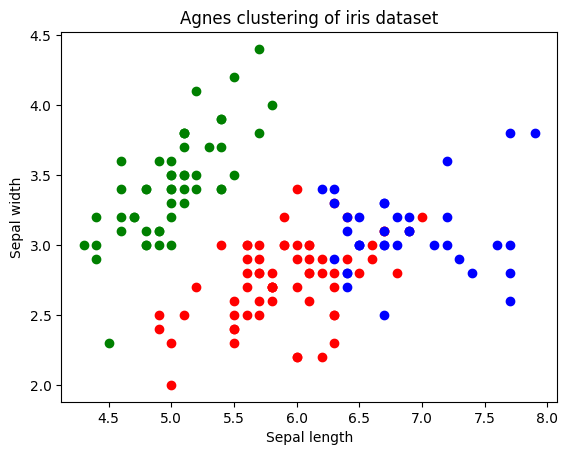

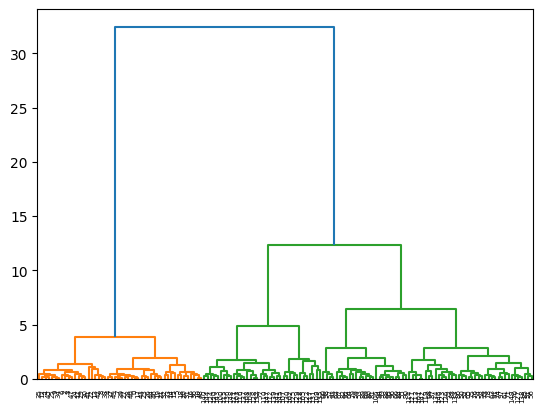

In [ ]:
import numpy as np
from typing import List, Tuple
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Load the iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Perform Agnes clustering with k=3 (number of classes in the iris dataset)
agnes = AgglomerativeClustering(n_clusters=3)
y_pred = agnes.fit_predict(X)

# Print the clusters
print("Clusters:")
for i in range(3):
    print(f"Cluster {i}: {np.where(y_pred == i)[0]}")

# Visualize the clusters
colors = ['r', 'g', 'b']
for i in range(X.shape[0]):
    plt.scatter(X[i, 0], X[i, 1], color=colors[int(y_pred[i])])
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Agnes clustering of iris dataset')
plt.show()
ltp=plt
# Create and show the dendrogram
Z = linkage(X, method='ward')
dendrogram(Z)
ltp.show()


Without Libraries

Clusters:
Cluster 0: [0, 17, 40, 4, 37, 7, 39, 49, 27, 28, 35, 10, 48, 23, 26, 43, 1, 9, 34, 45, 12, 29, 30, 25, 2, 3, 47, 8, 38, 42, 11, 6, 19, 21, 46, 13, 24, 36, 20, 31, 5, 18, 16, 32, 33, 44, 15, 14, 22, 41]
Cluster 1: [50, 52, 86, 51, 56, 54, 58, 65, 75, 74, 97, 77, 76, 71, 53, 89, 69, 80, 81, 67, 82, 92, 88, 94, 95, 96, 99, 90, 61, 55, 66, 84, 63, 91, 78, 73, 79, 85, 59, 70, 127, 138, 123, 126, 146, 149, 101, 142, 113, 121, 72, 83, 133, 103, 116, 137, 104, 128, 132, 110, 147, 111, 141, 145, 112, 139, 120, 143, 140, 144, 124, 115, 136, 148, 102, 125, 129, 64, 100, 119, 107, 130, 114, 62, 68, 87, 105, 122, 118, 135, 134, 108, 109, 57, 93, 60, 98, 106]
Cluster 2: [117, 131]


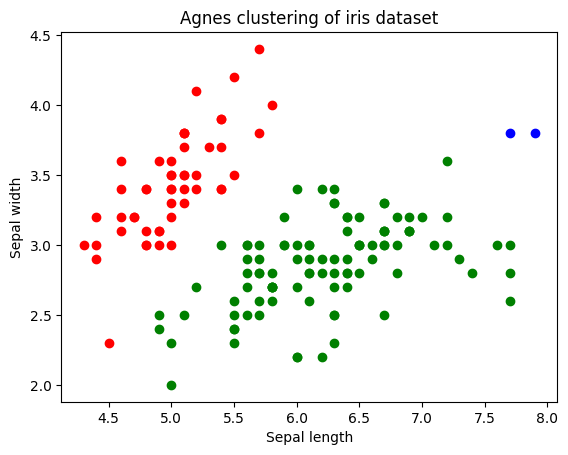

In [ ]:
import numpy as np
from typing import List, Tuple
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris


class Agnes:
    def __init__(self, k):
        self.k = k
        self.clusters = []
    
    def fit(self, X):
        n_samples = X.shape[0]
        self.clusters = [[i] for i in range(n_samples)]
        
        while len(self.clusters) > self.k:
            # Find the closest pair of clusters
            min_dist = float('inf')
            closest_clusters = None
            for i in range(len(self.clusters)):
                for j in range(i + 1, len(self.clusters)):
                    dist = self._single_linkage_dist(X, self.clusters[i], self.clusters[j])
                    if dist < min_dist:
                        min_dist = dist
                        closest_clusters = (i, j)
            
            # Merge the closest pair of clusters
            self.clusters[closest_clusters[0]] += self.clusters[closest_clusters[1]]
            del self.clusters[closest_clusters[1]]
    
    def predict(self, X):
        y_pred = np.zeros(X.shape[0])
        for i, cluster in enumerate(self.clusters):
            for j in cluster:
                y_pred[j] = i
        return y_pred
    
    def _single_linkage_dist(self, X, cluster1, cluster2):
        min_dist = float('inf')
        for i in cluster1:
            for j in cluster2:
                dist = np.linalg.norm(X[i] - X[j])
                if dist < min_dist:
                    min_dist = dist
        return min_dist


# Load the iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Perform Agnes clustering with k=3 (number of classes in the iris dataset)
agnes = Agnes(k=3)
agnes.fit(X)

# Predict the clusters for the data points
y_pred = agnes.predict(X)

# Print the clusters
print("Clusters:")
for i, cluster in enumerate(agnes.clusters):
    print(f"Cluster {i}: {cluster}")

# Visualize the clusters
colors = ['r', 'g', 'b']
for i in range(X.shape[0]):
    plt.scatter(X[i, 0], X[i, 1], color=colors[int(y_pred[i])])
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Agnes clustering of iris dataset')
plt.show()
